Распределяем файлы для подготовки данных

In [87]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

train_df = pd.read_csv('train_edit.csv')
valid_df = pd.read_csv('valid_edit.csv')
# train_df = pd.read_csv("../AC/trein.csv")
# valid_df = pd.read_csv("../AC/val.csv")

In [88]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']

Инициализация и настройка модели XGBoost с подбором гиперпараметров

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'max_depth': 1,
    'learning_rate': 0.3,
    'random_state': 1
}

In [90]:
y_prob = xgb_model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

NotFittedError: need to call fit or load_model beforehand

Построение ROC-кривой

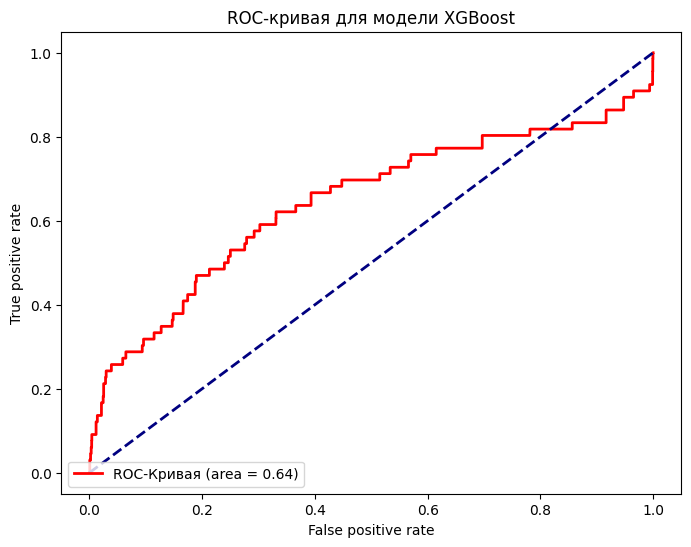

In [86]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-кривая для модели XGBoost')
plt.legend(loc='lower left')
plt.show()